# Yelp Data Challenge - Data Preprocessing

Yujun Zhou

Sep 22 2018

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame



In [115]:
import json
import pandas as pd

In [116]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'raw_dataset/business.json',
    'raw_dataset/checkin.json',
    'raw_dataset/review.json',
    'raw_dataset/tip.json',
    'raw_dataset/user.json'
]

In [117]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)

#### Business Data

In [118]:
with open(file_business,encoding='utf-8') as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [119]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [120]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


#### Checkin Data

In [121]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1..."


#### Review Data

In [122]:
#with open(file_review) as f:
#    df_review = pd.DataFrame(json.loads(line) for line in f)
#df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


#### Tip Data

In [125]:
#with open(file_tip) as f:
#    df_tip = pd.DataFrame(json.loads(line) for line in f)
#df_tip.head(2)

#### User Data

In [126]:
#with open(file_user) as f:
#    df_user = pd.DataFrame(json.loads(line) for line in f)
#df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [127]:
# Create filtered DataFrame, and name it df_filtered
# check if the city is las vegas 
cond_city  = df_business['city'] =='Las Vegas'

# check for nulls in cateogories 
cond_category_not_null = -df_business['categories'].isnull()

# check if 

cond_category_restraunt =df_business['categories'].apply(str).str.contains("Restaurants")
df_filtered = df_business[cond_city & cond_category_not_null & cond_category_restraunt]

    

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [128]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [129]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [130]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={"stars":"avg_stars"},inplace =True)

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [131]:
# Inspect your DataFrame
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6148 entries, 19 to 188567
Data columns (total 4 columns):
business_id    6148 non-null object
name           6148 non-null object
categories     6148 non-null object
avg_stars      6148 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.2+ KB


In [132]:
df_selected_business.head()

,business_id,name,categories,avg_stars
19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
61,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


#### Save results to csv files

In [133]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv("./clean_data/selected_business.csv",index = False,encoding="utf-8")

In [135]:
# Try reload the csv file to check if everything works fine
pd.read_csv("./clean_data/selected_business.csv",encoding="utf-8").head()

,business_id,name,categories,avg_stars
0,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
1,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
2,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
3,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
4,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [ ]:
# dir_part1 = 'sample_data/sample_review'

In [136]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


#### Prepare dataframes to be joined, - on business_id

In [137]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index("business_id")

In [138]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index("business_id")

#### Join! and reset index

In [139]:
# Join df_left and df_right. What type of join?
df_joined = df_left.join(df_right,how="inner")

In [140]:
# You may want to reset the index 
df_joined.reset_index(inplace=True)

In [141]:
del df_review
del df_right
del df_left

#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [142]:
df_joined.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2014-02-25,0,8eEp26oqTXmuIjVUJpLXHw,3,It was a real up and down evening.\nApps - BBQ...,0,AdxhlxXSGjRsCQxG6ZjfTw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-19,0,NQt645IJwa5ADM26UQ-jlA,5,we are a repeat customer-- best service - Thx ...,0,TMqFvYbWqs8BnjLsEXZjvQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-02,2,G9TSEZ8BfuSmcf5xy_qAfA,3,"Thanksgiving dinner with the family, ok food ...",5,KmubWHd-t2d3dxLZ13tBAA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-01-01,0,6prMgAjp2LZjuxRvmrFDIQ,4,We were seated promptly for our 5:30 p.m. rese...,0,bMFqD4beGrt_LjNGG_7xng


In [144]:
# Make a filter that selects date after 2015-01-20
cond_year_15 = df_joined['date']>u'2015-01-20'

In [145]:
# Filter the joined DataFrame and name it as df_final
df_final = df_joined[cond_year_15]

In [149]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640718 entries, 1 to 1053033
Data columns (total 12 columns):
business_id    640718 non-null object
name           640718 non-null object
categories     640718 non-null object
avg_stars      640718 non-null float64
cool           640718 non-null int64
date           640718 non-null object
funny          640718 non-null int64
review_id      640718 non-null object
stars          640718 non-null int64
text           640718 non-null object
useful         640718 non-null int64
user_id        640718 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 63.5+ MB


#### Take a glance at the final dataset

* Do more EDA here as you like!

In [146]:
import matplotlib.pyplot as plt

% matplotlib inline

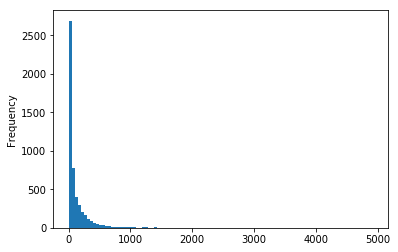

In [150]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final["business_id"].value_counts().plot.hist(bins=100)

## Save preprocessed dataset to csv file



In [151]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv("./clean_data/last_2_years_restaurant_reviews.csv",index = False,encoding="utf-8")